In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/styles.csv', on_bad_lines='skip')
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [3]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


,id,year
count,44424.000000,44423.000000
mean,29696.334301,2012.806497
std,17049.490518,2.126480
min,1163.000000,2007.000000
25%,14768.750000,2011.000000
50%,28618.500000,2012.000000
75%,44683.250000,2015.000000
max,60000.000000,2019.000000


In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
44419    False
44420    False
44421    False
44422    False
44423    False
Length: 44424, dtype: bool

In [5]:
df.duplicated().sum()

0

In [6]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [7]:
df['gender'].unique()

array(['Men', 'Women', 'Boys', 'Girls', 'Unisex'], dtype=object)

In [8]:
df['gender'].unique().sum()

'MenWomenBoysGirlsUnisex'

In [9]:
df['masterCategory'].unique()

array(['Apparel', 'Accessories', 'Footwear', 'Personal Care',
       'Free Items', 'Sporting Goods', 'Home'], dtype=object)

In [10]:
df['subCategory'].unique()

array(['Topwear', 'Bottomwear', 'Watches', 'Socks', 'Shoes', 'Belts',
       'Flip Flops', 'Bags', 'Innerwear', 'Sandal', 'Shoe Accessories',
       'Fragrance', 'Jewellery', 'Lips', 'Saree', 'Eyewear', 'Nails',
       'Scarves', 'Dress', 'Loungewear and Nightwear', 'Wallets',
       'Apparel Set', 'Headwear', 'Mufflers', 'Skin Care', 'Makeup',
       'Free Gifts', 'Ties', 'Accessories', 'Skin', 'Beauty Accessories',
       'Water Bottle', 'Eyes', 'Bath and Body', 'Gloves',
       'Sports Accessories', 'Cufflinks', 'Sports Equipment', 'Stoles',
       'Hair', 'Perfumes', 'Home Furnishing', 'Umbrellas', 'Wristbands',
       'Vouchers'], dtype=object)

In [11]:
df['articleType'].unique()

array(['Shirts', 'Jeans', 'Watches', 'Track Pants', 'Tshirts', 'Socks',
       'Casual Shoes', 'Belts', 'Flip Flops', 'Handbags', 'Tops', 'Bra',
       'Sandals', 'Shoe Accessories', 'Sweatshirts', 'Deodorant',
       'Formal Shoes', 'Bracelet', 'Lipstick', 'Flats', 'Kurtas',
       'Waistcoat', 'Sports Shoes', 'Shorts', 'Briefs', 'Sarees',
       'Perfume and Body Mist', 'Heels', 'Sunglasses', 'Innerwear Vests',
       'Pendant', 'Nail Polish', 'Laptop Bag', 'Scarves', 'Rain Jacket',
       'Dresses', 'Night suits', 'Skirts', 'Wallets', 'Blazers', 'Ring',
       'Kurta Sets', 'Clutches', 'Shrug', 'Backpacks', 'Caps', 'Trousers',
       'Earrings', 'Camisoles', 'Boxers', 'Jewellery Set', 'Dupatta',
       'Capris', 'Lip Gloss', 'Bath Robe', 'Mufflers', 'Tunics',
       'Jackets', 'Trunk', 'Lounge Pants', 'Face Wash and Cleanser',
       'Necklace and Chains', 'Duffel Bag', 'Sports Sandals',
       'Foundation and Primer', 'Sweaters', 'Free Gifts', 'Trolley Bag',
       'Tracksuits', 'S

In [12]:
df['baseColour'].unique()

array(['Navy Blue', 'Blue', 'Silver', 'Black', 'Grey', 'Green', 'Purple',
       'White', 'Beige', 'Brown', 'Bronze', 'Teal', 'Copper', 'Pink',
       'Off White', 'Maroon', 'Red', 'Khaki', 'Orange', 'Coffee Brown',
       'Yellow', 'Charcoal', 'Gold', 'Steel', 'Tan', 'Multi', 'Magenta',
       'Lavender', 'Sea Green', 'Cream', 'Peach', 'Olive', 'Skin',
       'Burgundy', 'Grey Melange', 'Rust', 'Rose', 'Lime Green', 'Mauve',
       'Turquoise Blue', 'Metallic', 'Mustard', 'Taupe', 'Nude',
       'Mushroom Brown', nan, 'Fluorescent Green'], dtype=object)

In [13]:
df['season'].unique()

array(['Fall', 'Summer', 'Winter', 'Spring', nan], dtype=object)

In [14]:
df['year'].unique()

array([2011., 2012., 2016., 2017., 2015., 2014., 2010., 2013., 2018.,
       2019., 2007., 2009., 2008.,   nan])

In [15]:
df['usage'].unique()

array(['Casual', 'Ethnic', 'Formal', 'Sports', nan, 'Smart Casual',
       'Travel', 'Party', 'Home'], dtype=object)

In [16]:
df['productDisplayName'].unique()

array(['Turtle Check Men Navy Blue Shirt',
       'Peter England Men Party Blue Jeans', 'Titan Women Silver Watch',
       ..., "Lotto Men's Soccer Track Flip Flop",
       'Puma Men Graphic Stellar Blue Tshirt',
       'Fossil Women Pink Dial Chronograph Watch ES3050'], dtype=object)

In [17]:
df.isnull()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
44419,False,False,False,False,False,False,False,False,False,False
44420,False,False,False,False,False,False,False,False,False,False
44421,False,False,False,False,False,False,False,False,False,False
44422,False,False,False,False,False,False,False,False,False,False


In [18]:
df.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [19]:
mean_value=df['year'].mean()
print(mean_value)

2012.8064966346262


In [20]:
df.replace(np.nan,'0',inplace = True)


df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

In [21]:
df.dtypes

id                     int64
gender                object
masterCategory        object
subCategory           object
articleType           object
baseColour            object
season                object
year                  object
usage                 object
productDisplayName    object
dtype: object

In [26]:
df['year'] = df['year'].astype('int64')
df.dtypes

id                     int64
gender                object
masterCategory        object
subCategory           object
articleType           object
baseColour            object
season                object
year                   int64
usage                 object
productDisplayName    object
dtype: object

<AxesSubplot:>

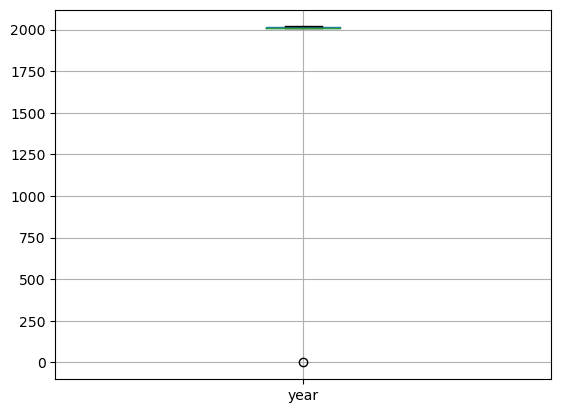

In [23]:
df[['year']].boxplot()

In [24]:
df.corr()

,id,year
id,1.000000,0.083666
year,0.083666,1.000000


<AxesSubplot:>

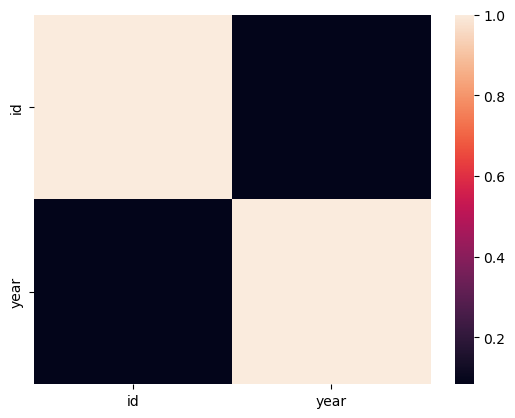

In [27]:
#Correlation plot

sns.heatmap(df.corr())

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/kaggle/input/fashion-product-images-dataset/fashion-dataset/images.csv', on_bad_lines='skip')
df.head()

,filename,link
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...


In [29]:
df['filename'].unique()

array(['15970.jpg', '39386.jpg', '59263.jpg', ..., '18842.jpg',
       '46694.jpg', '51623.jpg'], dtype=object)

In [30]:
df['link'].unique()

array(['http://assets.myntassets.com/v1/images/style/properties/7a5b82d1372a7a5c6de67ae7a314fd91_images.jpg',
       'http://assets.myntassets.com/v1/images/style/properties/4850873d0c417e6480a26059f83aac29_images.jpg',
       'http://assets.myntassets.com/v1/images/style/properties/Titan-Women-Silver-Watch_b4ef04538840c0020e4829ecc042ead1_images.jpg',
       ...,
       'http://assets.myntassets.com/v1/images/style/properties/e75923d709a7c7c200448642e22f0841_images.jpg',
       'http://assets.myntassets.com/v1/images/style/properties/c7978c0dcc82aeba1a85268aebf28567_images.jpg',
       'http://assets.myntassets.com/assets/images/51623/2016/5/20/11463745850786-Fossil-Women-Pink-Dial-Chronograph-Watch-ES3050-9371463745850648-1.jpg'],
      dtype=object)

In [31]:
df.isnull()

,filename,link
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
44441,False,False
44442,False,False
44443,False,False
44444,False,False


In [32]:
df.isnull().sum()

filename    0
link        0
dtype: int64

In [ ]:
mean_value=df['filename'].mean()
print(mean_value)